<a href="https://colab.research.google.com/github/begumpoly/Golden-Globe-Awards/blob/main/goldenglobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # Import the pandas library for data manipulation and analysis, commonly aliased as 'pd'.
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib for creating plots and visualizations, commonly aliased as 'plt'.
import seaborn as sns # Import the seaborn library, which is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics, commonly aliased as 'sns'.
import plotly.figure_factory as ff # Import the figure_factory module from the plotly library, which contains functions to create specific types of figures, commonly aliased as 'ff'.
from IPython.display import display, HTML # Import the display and HTML functions from IPython.display for enhanced output display in Jupyter notebooks.
import plotly.express as px # Import the express module from the plotly library, a high-level API for quickly creating plotly figures, commonly aliased as 'px'.
import plotly.graph_objects as go # Import the graph_objects module from the plotly library, the lower-level API for creating detailed plotly figures, commonly aliased as 'go'.
import plotly.subplots as sp # Import the subplots module from the plotly library, used for creating figures with multiple plots arranged in a grid, commonly aliased as 'sp'.

In [6]:
!pip install opendatasets
import opendatasets as od

In [7]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/unanimad/golden-globe-awards'
od.download('https://www.kaggle.com/datasets/unanimad/golden-globe-awards')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: begumpoly
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/unanimad/golden-globe-awards


100%|██████████| 117k/117k [00:00<00:00, 122MB/s]

In [ ]:
project_name = ("Golden Globe Awards, 1944 - 2020")

In [18]:
# Define the path to the dataset file
file_path = './golden-globe-awards/golden_globe_awards.csv'
# Read the CSV file into a pandas DataFrame
award_df = pd.read_csv(file_path)

In [25]:
award_df.shape #Display the dimensions (rows, columns) of the DataFrame


(7991, 7)

In [24]:
award_df.columns # Display the names of the columns in the DataFrame

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')

In [23]:
award_df.info()# concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


**Data** Cleaning

In [22]:
award_df.isnull().sum()# Count the number of missing values for each column

,0
year_film,0
year_award,0
ceremony,0
category,0
nominee,0
film,1800
win,0


In [26]:
#Removing Duplicates:
award_df.drop_duplicates(inplace=True)


In [ ]:
award_df.columns = award_df.columns.str.replace(' ', '')# removes spaces in each column name

In [ ]:
award_df.head()


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [ ]:
#Removing Duplicates:

award_df.drop_duplicates(inplace=True)


In [29]:
award_df['film'] = award_df['film'].fillna('N/s')

In [28]:
print(award_df['film'])

0       For Whom The Bell Tolls
1       For Whom The Bell Tolls
2        The Song Of Bernadette
3                           NaN
4        The Song Of Bernadette
                 ...           
7986                 Succession
7987                    Fleabag
7988                      Barry
7989                        NaN
7990                        NaN
Name: film, Length: 7991, dtype: object


In [27]:
award_df.to_csv('golden_globe_awards_cleaned.csv', index=False)# cleaned data


In [30]:
# Read the cleaned CSV file back into a new DataFrame
cleaned_df = pd.read_csv('golden_globe_awards_cleaned.csv')

In [35]:
print(award_df["category"].value_counts().head(10)) # Print the top 10 most frequent award categories and their counts

category
Best Performance by an Actress in a Supporting Role in any Motion Picture    360
Best Director - Motion Picture                                               357
Best Performance by an Actor in a Supporting Role in any Motion Picture      352
Best Motion Picture - Drama                                                  351
Best Performance by an Actor in a Motion Picture - Drama                     344
Best Performance by an Actor in a Motion Picture - Musical or Comedy         342
Best Performance by an Actress in a Motion Picture - Drama                   342
Best Original Score - Motion Picture                                         320
Best Motion Picture - Musical or Comedy                                      306
Best Screenplay - Motion Picture                                             293
Name: count, dtype: int64


This indicates that 'Best Performance by an Actress in a Supporting Role in any Motion Picture' apears most in the award.

```
# This is formatted as code
```





</Category>


<div style="text-align:center;">

## **Visualization**

</div>

<div style="text-align:center;">

## **Catagory**

</div>

In [41]:
# Calculate the frequency of each unique value in the 'category' column
category_counts = award_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.treemap(category_counts, path=['category'], values='count',
                 title='Proportion of Award Categories')
fig.show()

<ipython-input-47-2580f0a2495a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




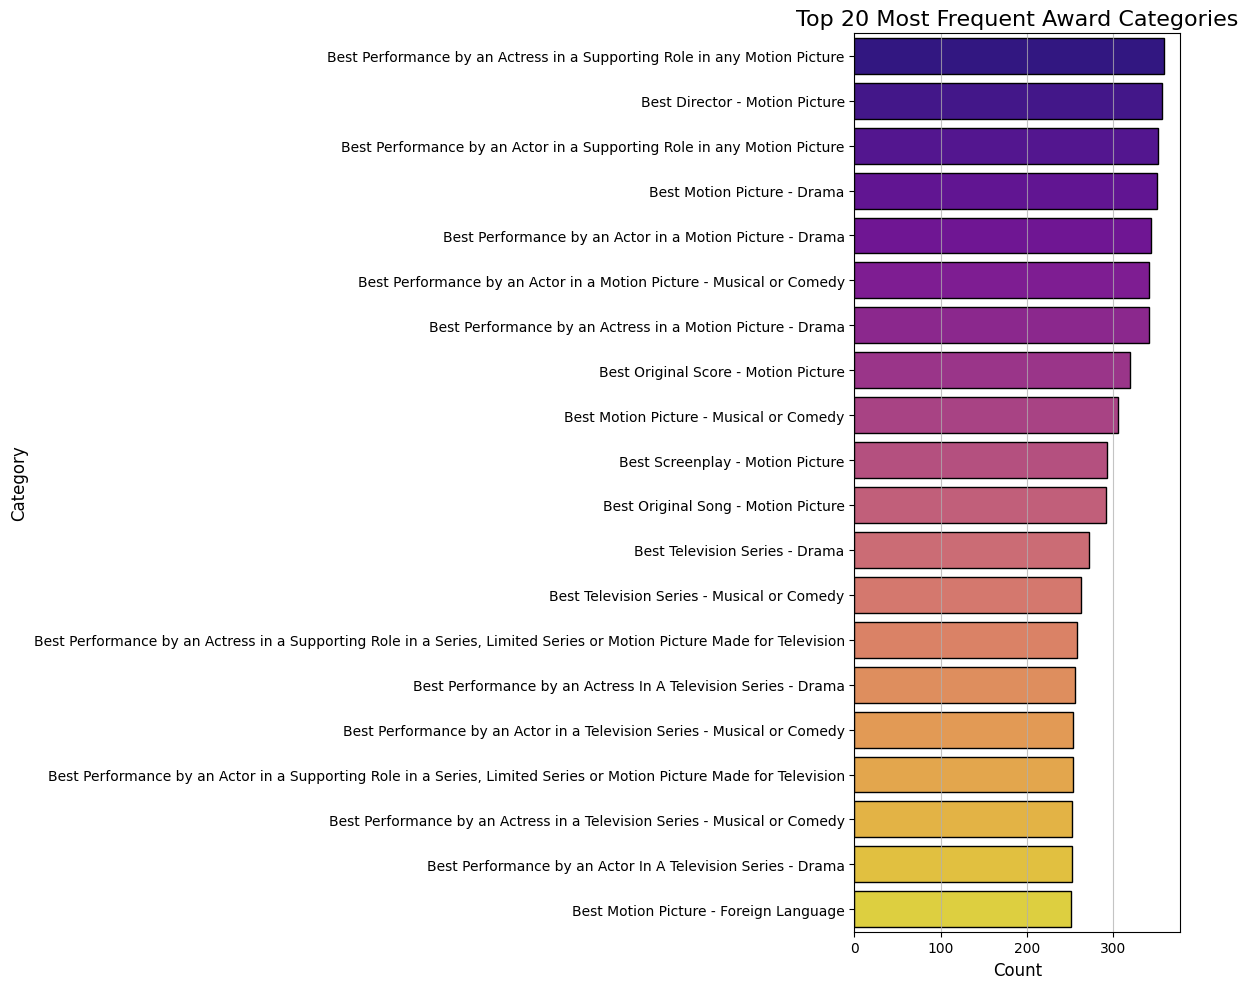

In [ ]:
## Get the top 20 categories by count
top_20_categories = df['category'].value_counts().nlargest(20).index

## Filter the DataFrame to include only the top 20 categories
df_top_20 = df[df['category'].isin(top_20_categories)]

## Create the count plot for the top 20 categories
plt.figure(figsize=(12, 10)) # Adjust figure size to accommodate 20 bars
sns.countplot(data=df_top_20, y='category', order=top_20_categories, palette='plasma', edgecolor='black')
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Set plot titles and labels
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Add a grid for better readability
plt.grid(axis='x', alpha=0.75)

## Adjust layout
plt.tight_layout()

## Display the plot
plt.show();

In [54]:
# Separate awards for actors by checking if 'category' contains 'Actor'
actor_awards = award_df[award_df['category'].str.contains('Actor', na=False)]

# Separate awards for actresses by checking if 'category' contains 'Actress'
actress_awards = award_df[award_df['category'].str.contains('Actress', na=False)]

# Print the DataFrame containing actor awards
print("Actor Awards:")
print(actor_awards)


Actor Awards:
      year_film  year_award  ceremony  \
1          1943        1944         1   
5          1943        1944         1   
7          1944        1945         2   
11         1944        1945         2   
13         1945        1946         3   
...         ...         ...       ...   
7984       2019        2020        77   
7985       2019        2020        77   
7986       2019        2020        77   
7987       2019        2020        77   
7988       2019        2020        77   

                                               category            nominee  \
1     Best Performance by an Actor in a Supporting R...      Akim Tamiroff   
5                               Actor In A Leading Role         Paul Lukas   
7     Best Performance by an Actor in a Supporting R...   Barry Fitzgerald   
11                              Actor In A Leading Role     Alexander Knox   
13    Best Performance by an Actor in a Supporting R...   J. Carroll Naish   
...                      

In [53]:
# Print the DataFrame containing actress awards
print("\nActress Awards:") # Add a newline for better separation in the output
print(actress_awards)


Actress Awards:
      year_film  year_award  ceremony  \
0          1943        1944         1   
4          1943        1944         1   
6          1944        1945         2   
10         1944        1945         2   
12         1945        1946         3   
...         ...         ...       ...   
7979       2019        2020        77   
7980       2019        2020        77   
7981       2019        2020        77   
7982       2019        2020        77   
7983       2019        2020        77   

                                               category               nominee  \
0     Best Performance by an Actress in a Supporting...        Katina Paxinou   
4                             Actress In A Leading Role        Jennifer Jones   
6     Best Performance by an Actress in a Supporting...       Agnes Moorehead   
10                            Actress In A Leading Role        Ingrid Bergman   
12    Best Performance by an Actress in a Supporting...       Angela Lansbury   
... 

<ipython-input-52-ce62c64e2a4a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




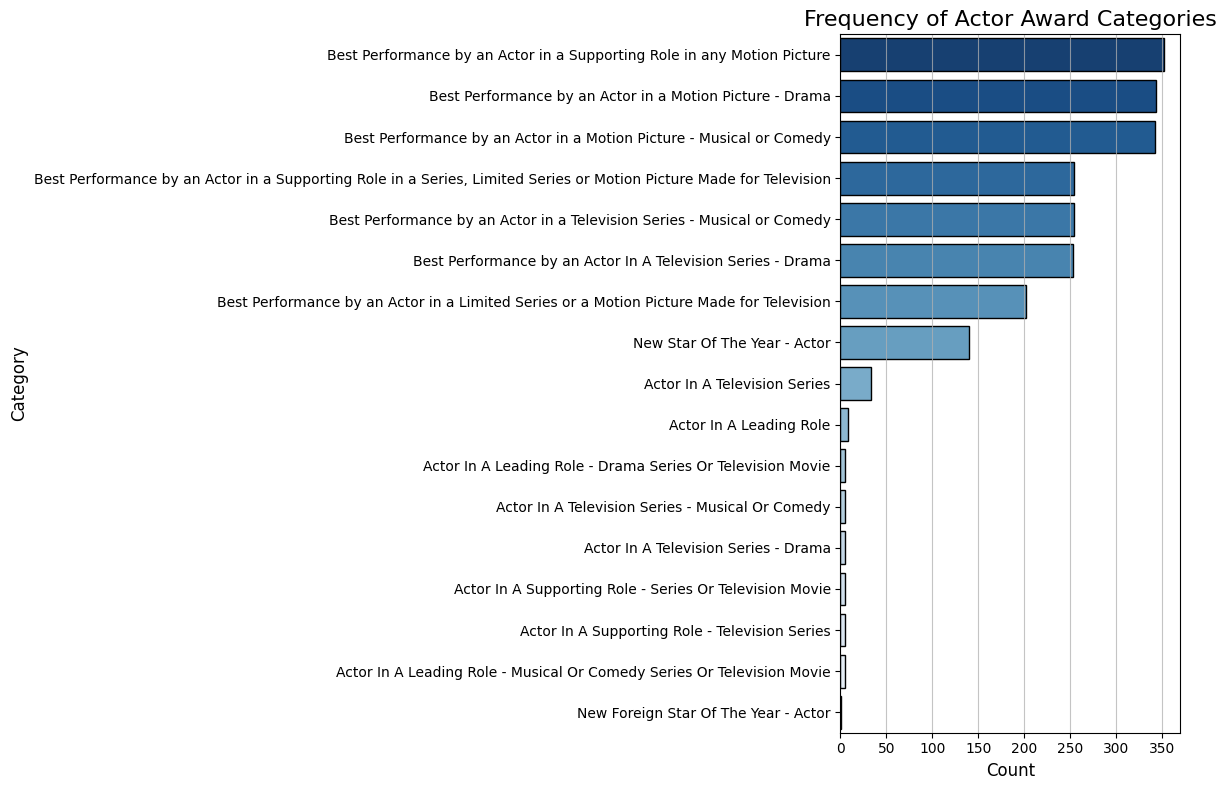

<ipython-input-52-ce62c64e2a4a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




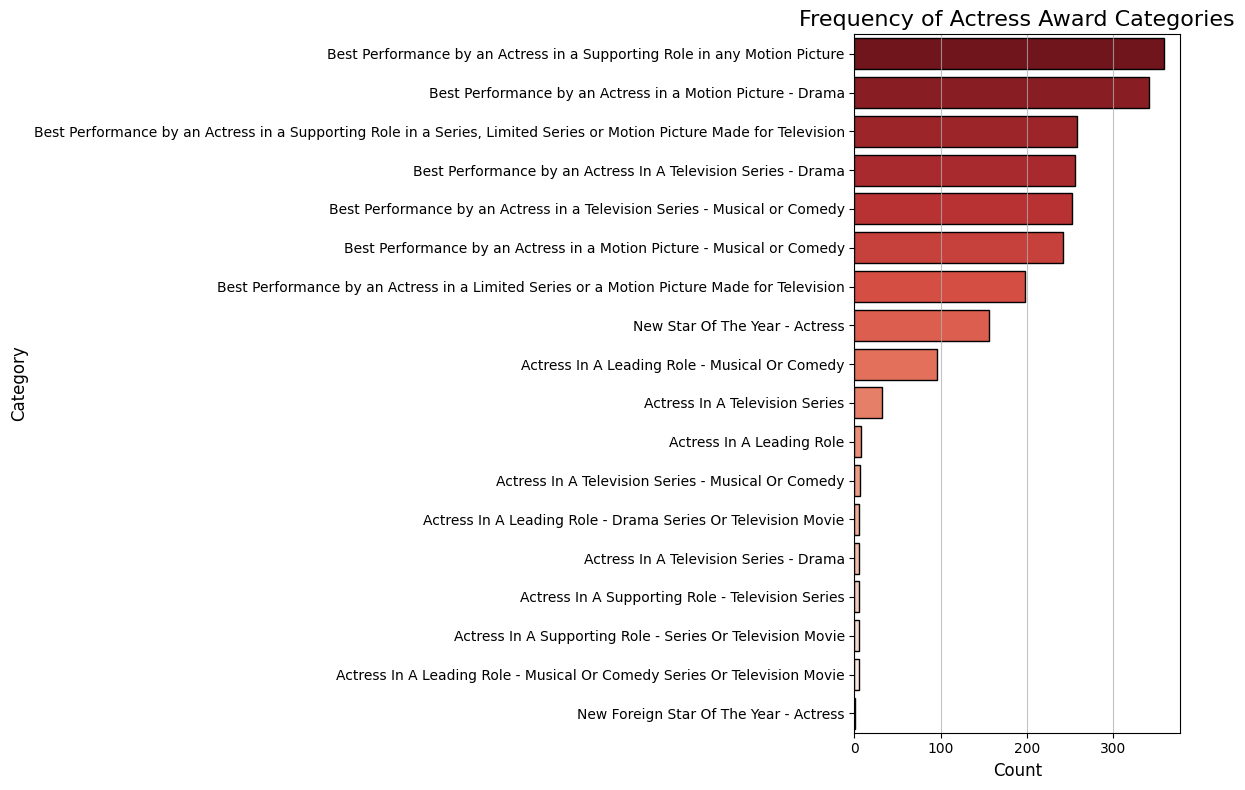

In [52]:
## Count plot for Actor Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actor_awards, y='category', order=actor_awards['category'].value_counts().index, palette='Blues_r', edgecolor='black')
plt.title('Frequency of Actor Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

## Count plot for Actress Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actress_awards, y='category', order=actress_awards['category'].value_counts().index, palette='Reds_r', edgecolor='black')
plt.title('Frequency of Actress Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')


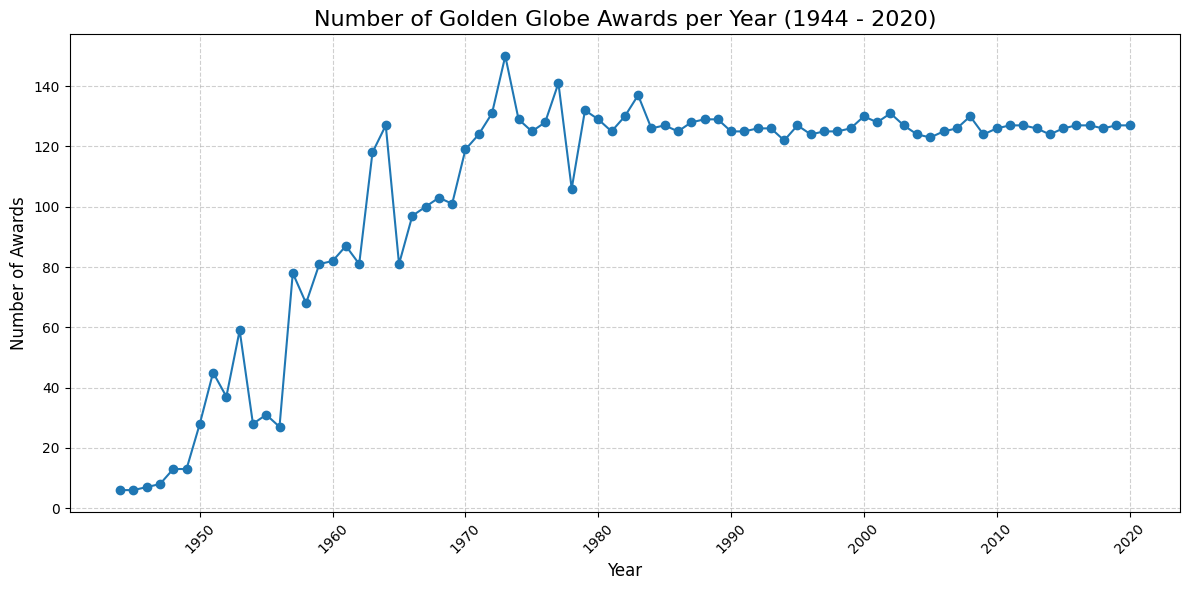

In [51]:
print(award_df.columns)
# awards_per_year = award_df['year'].value_counts().sort_index() # Original line
awards_per_year = award_df['year_award'].value_counts().sort_index()

## Create a line plot of awards per year
plt.figure(figsize=(12, 6))
awards_per_year.plot(kind='line', marker='o') # Use the plot method of the pandas Series
plt.title('Number of Golden Globe Awards per Year (1944 - 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

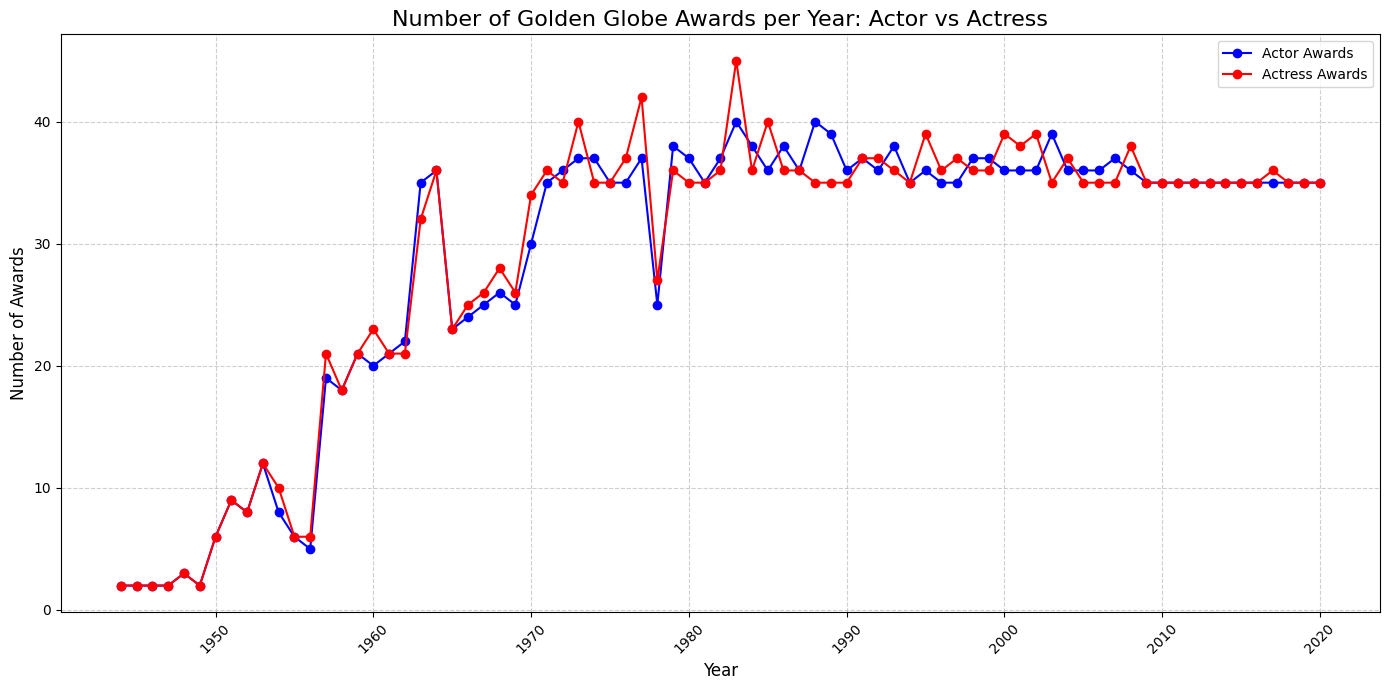

In [47]:
# Ensure 'year_award' is treated as a numeric column if it's not already
actor_awards['year_award'] = pd.to_numeric(actor_awards['year_award'], errors='coerce')
actress_awards['year_award'] = pd.to_numeric(actress_awards['year_award'], errors='coerce')

# Drop any rows where conversion to numeric failed (if errors='coerce')
actor_awards = actor_awards.dropna(subset=['year_award'])
actress_awards = actress_awards.dropna(subset=['year_award'])

# Count awards per year for actors and actresses
actor_awards_per_year = actor_awards['year_award'].value_counts().sort_index()
actress_awards_per_year = actress_awards['year_award'].value_counts().sort_index()

# Create a line plot comparing awards per year for actors and actresses
plt.figure(figsize=(14, 7))
plt.plot(actor_awards_per_year.index, actor_awards_per_year.values, marker='o', linestyle='-', label='Actor Awards', color='blue')
plt.plot(actress_awards_per_year.index, actress_awards_per_year.values, marker='o', linestyle='-', label='Actress Awards', color='red')

plt.title('Number of Golden Globe Awards per Year: Actor vs Actress', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend() # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()

Tv series

In [ ]:
# Filter the DataFrame for TV series
# We'll look for keywords in the 'category' column
tv_series_keywords = ['Television', 'Series', 'TV']
tv_awards_df = award_df[
    award_df['category'].str.contains('|'.join(tv_series_keywords), case=False, na=False)
]

# Display the first few rows of the filtered DataFrame
print("TV Series Awards Data:")
print(tv_awards_df.head())

# Print the number of TV series award entries found
print(f"\nTotal TV series award entries: {tv_awards_df.shape[0]}")